<a href="https://colab.research.google.com/github/mr-sumit57/mr-sumit57/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sbs

sbs.set_theme()

# %matplotlib qt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

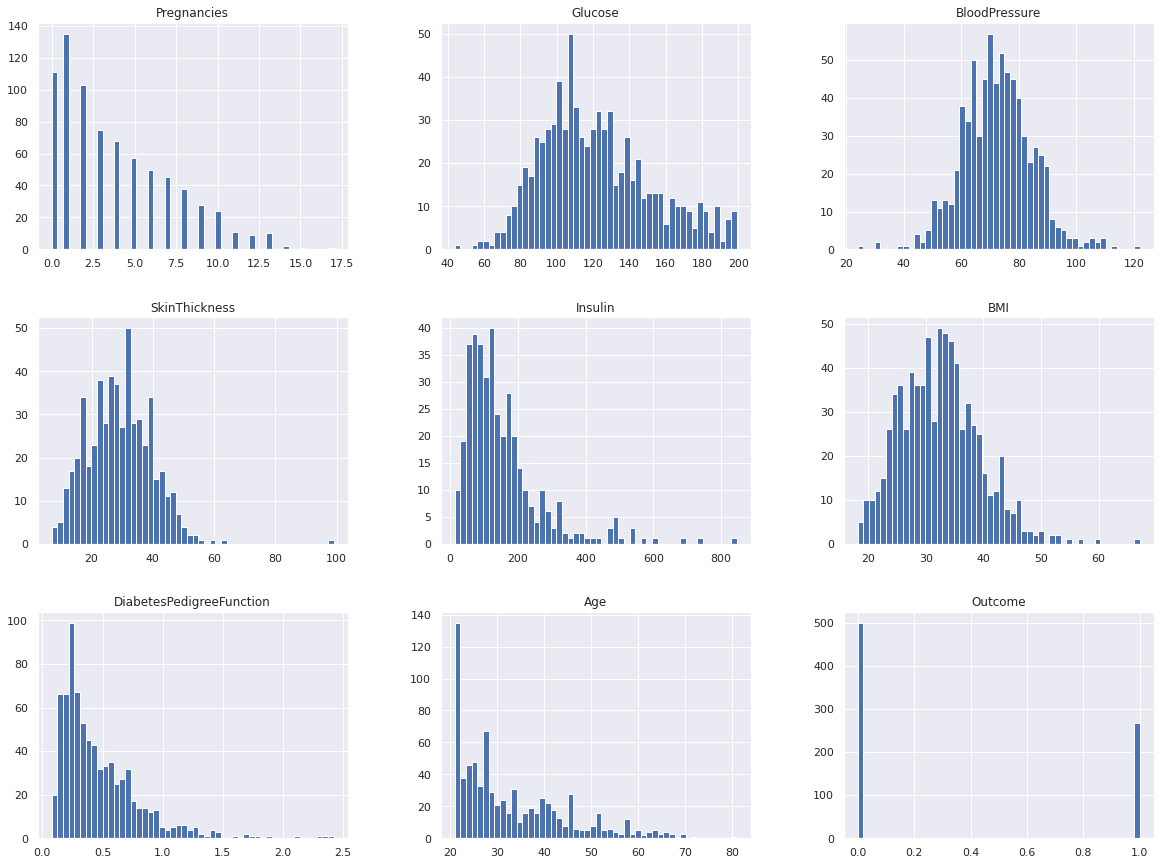

In [6]:
_ = df.hist(bins=50, figsize=(20, 15))

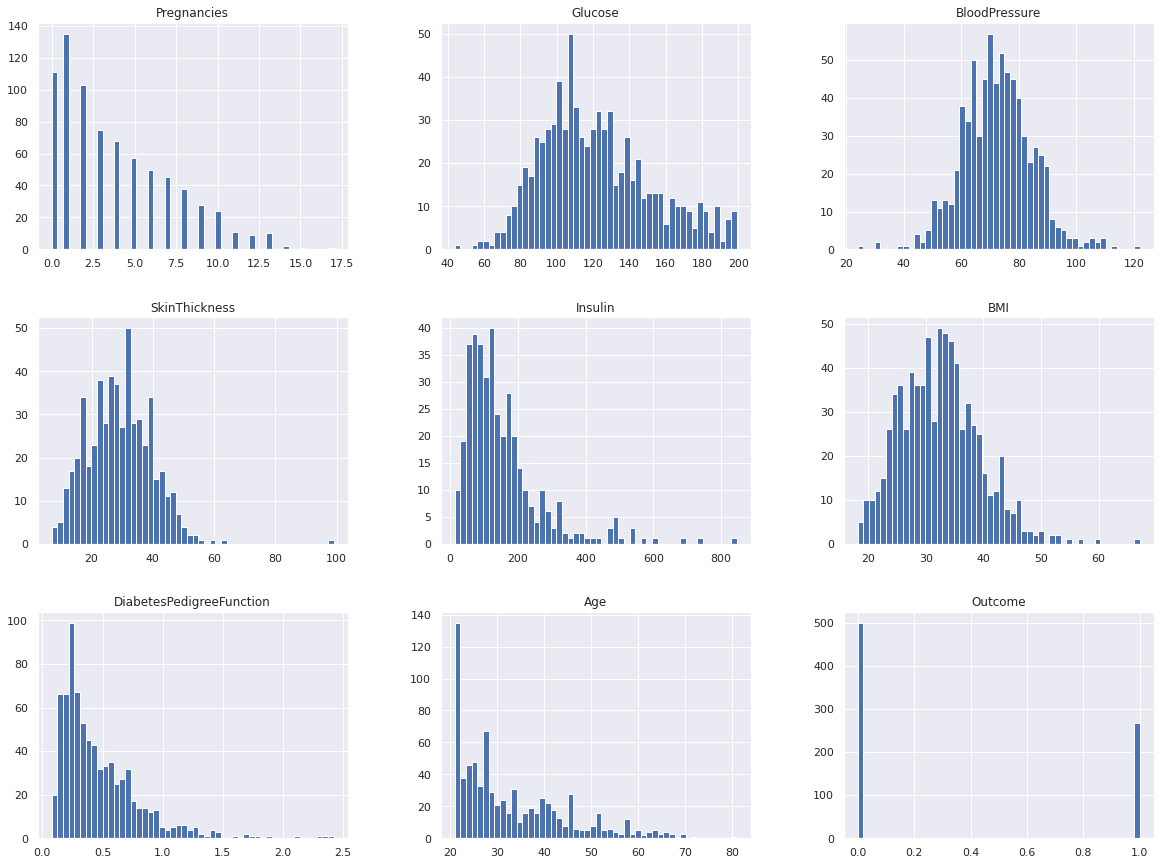

In [7]:
_ = df.hist(bins=50, figsize=(20, 15))

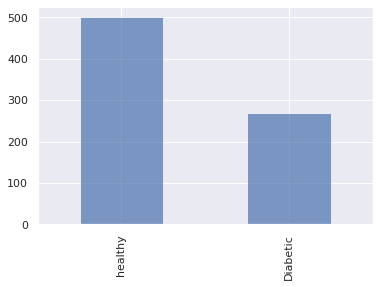

In [9]:
Healthy =  df[ df['Outcome'] == 0 ]
Diabetic = df[ df['Outcome'] == 1 ]

h_diab = pd.Series({'healthy':Healthy.shape[0],
            'Diabetic':Diabetic.shape[0]})
h_diab.plot.bar(alpha=0.7)

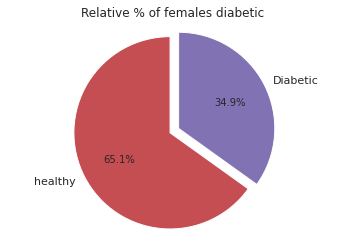

In [10]:
h_diab.plot.pie(startangle=90, 
                explode=[0, 0.1],
                autopct='%1.1f%%',
                colors=['C3', 'C4'])
plt.title('Relative % of females diabetic ')
plt.ylabel('')
_ = plt.axis('equal')

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df.pivot_table(index=['Outcome'] )

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.859674,70.877339,0.429734,110.643863,130.287879,3.298000,27.235457
1,37.067164,35.406767,75.321429,0.550500,142.319549,206.846154,4.865672,33.000000


In [13]:
def replace_null_values(df):
    for col in df.columns:
        df.loc[(df['Outcome']==0) & (df[col].isnull()), col] = df[df['Outcome'] == 0][col].median()
        df.loc[(df['Outcome']==1) & (df[col].isnull()), col] = df[ df['Outcome'] == 1][col].median()
    print(df.isnull().sum())
    
replace_null_values(df)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
